In [43]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/mayankkedia/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


> For Zeppelin notebook


    %pyspark
    import json
    sc._jsc.hadoopConfiguration().set("fs.s3n.awsAccessKeyId",'')
    sc._jsc.hadoopConfiguration().set("fs.s3n.awsSecretAccessKey", '')

    tweets = sc.textFile("s3n://epl-twitter/raw-data2016/05/*/*").map(lambda x:x.rstrip(",")).map(lambda x: json.loads(x))
    tweets.cache()
    print tweets.count()


In [2]:
tweets = sc.textFile("/Users/mayankkedia/code/epl-twitter/sample_tweets/smaller_sample/")

In [6]:
tweets = tweets.map(lambda x: x.rstrip(",")).map(lambda x: json.loads(x))

In [13]:
tweets.take(1)

[{u'contributors': None,
  u'coordinates': None,
  u'created_at': u'Sun May 01 14:29:52 +0000 2016',
  u'entities': {u'hashtags': [],
   u'symbols': [],
   u'urls': [],
   u'user_mentions': [{u'id': 2915253371,
     u'id_str': u'2915253371',
     u'indices': [3, 12],
     u'name': u'Atanas\u2122',
     u'screen_name': u'Atanasi_'}]},
  u'favorite_count': 0,
  u'favorited': False,
  u'filter_level': u'low',
  u'geo': None,
  u'id': 726780684526862300,
  u'id_str': u'726780684526862336',
  u'in_reply_to_screen_name': None,
  u'in_reply_to_status_id': None,
  u'in_reply_to_status_id_str': None,
  u'in_reply_to_user_id': None,
  u'in_reply_to_user_id_str': None,
  u'is_quote_status': False,
  u'lang': u'en',
  u'place': None,
  u'retweet_count': 0,
  u'retweeted': False,
  u'retweeted_status': {u'contributors': None,
   u'coordinates': None,
   u'created_at': u'Sun May 01 13:22:28 +0000 2016',
   u'entities': {u'hashtags': [],
    u'symbols': [],
    u'urls': [],
    u'user_mentions': []},

In [15]:
print "Number of tweets {}".format(tweets.count())


Number of tweets 21797


## Checking for not null 'geo' attribute

In [16]:
## Filtering tweets which have a 'geo' element
print "Number of tweets which have non null geo {}".format(tweets
                                                           .filter(lambda x: x['geo'])
                                                           .count())

Number of tweets which have non null geo 51


## Checking for not null 'coordinate' attribute

In [17]:

## Filtering tweets which have a 'coordinate' element
print "Number of tweets which have non null coordinate {}".format(tweets
                                                                  .filter(lambda x: x['coordinates'])
                                                                  .count())

Number of tweets which have non null geo 51


## Checking for not null 'place' attribute

In [18]:
## Filtering tweets which have a 'place' element
print "Number of tweets which have non null place {}".format(tweets
                                                             .filter(lambda x: x['place'])
                                                             .count())

Number of tweets which have non null place 755


In [20]:
tweets.filter(lambda x: x['place']).map(lambda x: (x['place'], 1)).take(1)

[({u'attributes': {},
   u'bounding_box': {u'coordinates': [[[-9.229826, 38.691375],
      [-9.229826, 38.795853],
      [-9.090164, 38.795853],
      [-9.090164, 38.691375]]],
    u'type': u'Polygon'},
   u'country': u'Portugal',
   u'country_code': u'PT',
   u'full_name': u'Lisboa, Portugal',
   u'id': u'c1430b24da8e9229',
   u'name': u'Lisboa',
   u'place_type': u'city',
   u'url': u'https://api.twitter.com/1.1/geo/id/c1430b24da8e9229.json'},
  1)]

#### From the twitter API
> Places are specific, named locations with corresponding geo coordinates. They can be attached to Tweets by specifying a place_id when tweeting. Tweets associated with places are not necessarily issued from that location but could also potentially be about that location. Places can be searched for. Tweets can also be found by place_id.

#### Aggregating by place names

In [23]:
placeMap = tweets.filter(lambda x: x['place']).map(lambda x: (x['place']['full_name'], 1))
placeMap.reduceByKey(lambda x,y:x+y).collect()

[(u'Pooler, GA', 1),
 (u'Gustavo A. Madero, Distrito Federal', 1),
 (u'San Jos\xe9 del Guaviare, Colombia', 1),
 (u'Buenos Aires, Argentina', 2),
 (u'Winter Garden, FL', 1),
 (u'San Andr\xe9s Cholula, Puebla', 1),
 (u'Kansas, USA', 1),
 (u'La Oliva, Spain', 1),
 (u'S\xe3o Bernardo do Campo, Brasil', 1),
 (u'Bolivia', 1),
 (u'Southampton, England', 1),
 (u'Sydney, New South Wales', 1),
 (u'Cardiff, Wales', 1),
 (u'Oslo, Norge', 1),
 (u'Campinas, Brasil', 1),
 (u'Winterthur, Schweiz', 1),
 (u'Duitama, Colombia', 1),
 (u'La Rioja, Argentina', 1),
 (u'Austin, TX', 2),
 (u'Trabzon, T\xfcrkiye', 1),
 (u'Lionville, PA', 1),
 (u'Ensenada, Argentina', 1),
 (u'Snodland, South East', 1),
 (u'Sevilla, Espa\xf1a', 1),
 (u'Kumasi, Ghana', 3),
 (u'Hollywood, FL', 2),
 (u'Cork, Ireland', 3),
 (u'Wilmslow, England', 1),
 (u'Koblenz, Germany', 1),
 (u'Le\xf3n, Guanajuato', 1),
 (u'Itinga, Brasil', 2),
 (u'Stockport, England', 1),
 (u'Virginia Beach, VA', 1),
 (u'Maldives', 1),
 (u'Nassarawa, Nigeria', 2

#### By Country

In [24]:
placeMap = tweets.filter(lambda x: x['place']).map(lambda x: (x['place']['country'], 1))
placeMap.reduceByKey(lambda x,y:x+y).collect()

[(u'United Kingdom', 169),
 (u'Tanzania', 2),
 (u'Bolivia', 1),
 (u'Danmark', 2),
 (u'South Africa', 11),
 (u'Jamaica', 5),
 (u'Maldives', 1),
 (u'Espa\xf1a', 21),
 (u'Uruguay', 12),
 (u'\u0633\u0644\u0637\u0646\u0629 \u0639\u0645\u0627\u0646', 1),
 (u'\u067e\u0627\u06a9\u0633\u062a\u0627\u0646', 1),
 (u'Brasil', 81),
 (u'Zimbabwe', 1),
 (u'Sverige', 3),
 (u'Belgi\xeb', 3),
 (u'Ghana', 9),
 (u'Australia', 2),
 (u'\u0e1b\u0e23\u0e30\u0e40\u0e17\u0e28\u0e44\u0e17\u0e22', 5),
 (u'Nicaragua', 2),
 (u'Trinidad and Tobago', 3),
 (u'Italia', 7),
 (u'Honduras', 2),
 (u'\u4e2d\u534e\u4eba\u6c11\u5171\u548c\u56fd', 1),
 (u'Nederland', 1),
 (u'\u0627\u0644\u0645\u0645\u0644\u0643\u0629 \u0627\u0644\u0639\u0631\u0628\u064a\u0629 \u0627\u0644\u0633\u0639\u0648\u062f\u064a\u0629',
  3),
 (u'Panama', 1),
 (u'\u0627\u0644\u0627\u0645\u0627\u0631\u0627\u062a \u0627\u0644\u0639\u0631\u0628\u064a\u0629 \u0627\u0644\u0645\u062a\u062d\u062f\u0629',
  7),
 (u'M\xe9xico', 30),
 (u'Namibia', 1),
 (u'Chile', 1

### places don't seem to be the most useful thing then

### Things to Look at 
- Language
- Location of User
- Hashtags

#### Language

In [28]:
language_counts = tweets.map(lambda x: (x['lang'],1)).reduceByKey(lambda x,y: x+y).collect()

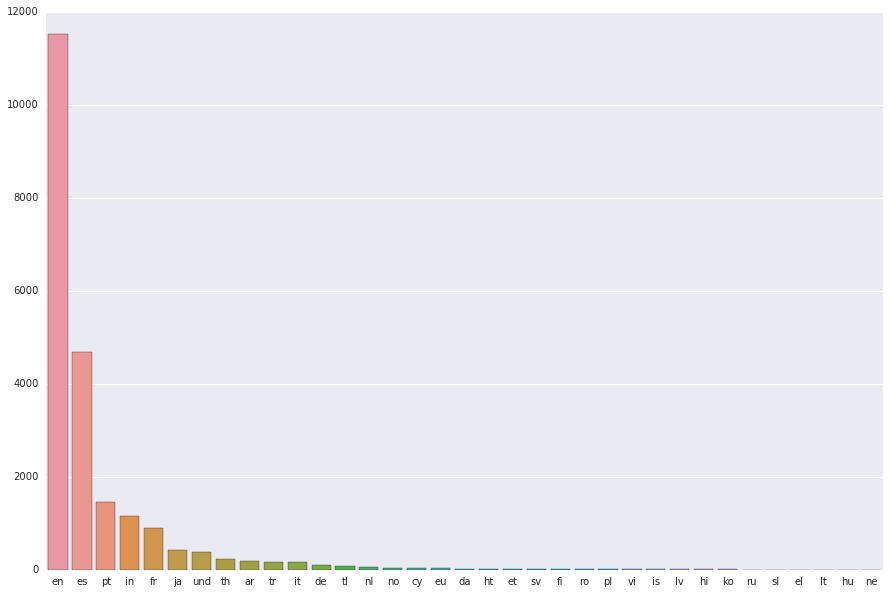

In [50]:
plt.figure(figsize=(15, 10))
sns.barplot(map(lambda x:x[0], language_counts),map(lambda x:x[1], language_counts))


#### Location of user

In [53]:
## Number of tweets where users have a location
tweets.filter(lambda x:x['user']['location']).count()

15046

#### From the Twitter API
> **location (for a user)**: Nullable. The user-defined location for this account’s profile. Not necessarily a location nor parseable. This field will occasionally be fuzzily interpreted by the Search service.

#### Hashtags

In [56]:
tweets_with_hashtags = tweets.filter(lambda x: x['entities']['hashtags'])

In [68]:
hashtag_rdd = tweets_with_hashtags.flatMap(lambda x:x['entities']['hashtags']).map(lambda x: (x['text'],1))
hashtag_count = hashtag_rdd.reduceByKey(lambda x,y:x+y).collect()

In [70]:
sorted(hashtag_count, key=lambda x:x[1], reverse=True)

[(u'mufc', 2273),
 (u'MUFC', 999),
 (u'LCFC', 883),
 (u'Leicester', 674),
 (u'PREMIERxESPN', 596),
 (u'MUNLEI', 570),
 (u'lcfc', 466),
 (u'BPL', 423),
 (u'LeicesterCity', 356),
 (u'MnuLei', 308),
 (u'PremierLeague', 220),
 (u'InglesNoFOXSports', 172),
 (u'EPL', 167),
 (u'mnulei', 164),
 (u'MUFCvLEI', 144),
 (u'MUFCvLCFC', 143),
 (u'ManUtd', 138),
 (u'\u30ec\u30b9\u30bf\u30fc', 103),
 (u'Ranieri', 90),
 (u'\u0644\u064a\u0633\u062a\u0631_\u0645\u0627\u0646_\u064a\u0648\u0646\u0627\u064a\u062a\u062f',
  87),
 (u'MULEI', 84),
 (u'\u0645\u0627\u0646\u0634\u0633\u062a\u0631_\u064a\u0648\u0646\u0627\u064a\u062a\u062f_\u0644\u064a\u0633\u062a\u0631_\u0633\u064a\u062a\u064a',
  80),
 (u'GGMU', 78),
 (u'ManchesterUnited', 57),
 (u'epl', 55),
 (u'Foxes', 46),
 (u'football', 43),
 (u'GoFoxes', 43),
 (u'leicester', 38),
 (u'RussianGP', 37),
 (u'leicestervsmanutd', 36),
 (u'EURO2016', 34),
 (u'LCFCvMUFC', 34),
 (u'beinpremier', 34),
 (u'MatchdayMac', 34),
 (u'Mufc', 33),
 (u'manutd', 33),
 (u'bpl', 

### Can do ?
- Probably can do some analysis on the hashtags related to what it contains etc. 
- Maybe not that valuable though

## Some texts from the tweets

In [96]:

parseAndRemoveStopWords('Leicester unchanged for Man Utd title clash: Leicester City manager Claudio Ranieri named an unchanged starti... https://t.co/CoDlEPuB9R')

LookupError: 
**********************************************************************
  Resource u'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/mayankkedia/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [1]:
from pyspark.mllib.feature import Word2Vec


word2vec = Word2Vec()
#model = word2vec.fit(tweet_words)


In [80]:

synonyms = model.findSynonyms('champion', 10)

for word, cosine_distance in synonyms:
    print("{}: {}".format(word, cosine_distance))

ground.

What: 0.403055431927
fight!: 0.394587612713
ref: 0.388615881267
brand: 0.381941295977
crown: 0.37946457563
such: 0.370249683251
ban,: 0.364108141511
commentator: 0.358721789716
pick: 0.357994002491
joke: 0.355026031386
